In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

- 한글 경로 오류
https://blog-st.tistory.com/entry/Python-OpenCV-%ED%95%9C%EA%B8%80%EC%9C%A0%EB%8B%88%ED%8A%B8%EC%BD%94%EB%93%9C-%EA%B2%BD%EB%A1%9C-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%97%B4%EA%B8%B0%EC%A0%80%EC%9E%A5
- 대표 색상 추출
https://inyl.github.io/programming/2017/07/31/opencv_image_color_cluster.html

In [208]:
PATH = "C:/final project/"

In [220]:
img_path = "images/하트퍼센트 도트 온 무드 글로우 블러쉬 2종 택1/01 로즈 플러시(상품색상).jpg"
image = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8), cv2.IMREAD_COLOR)
# bgr->rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

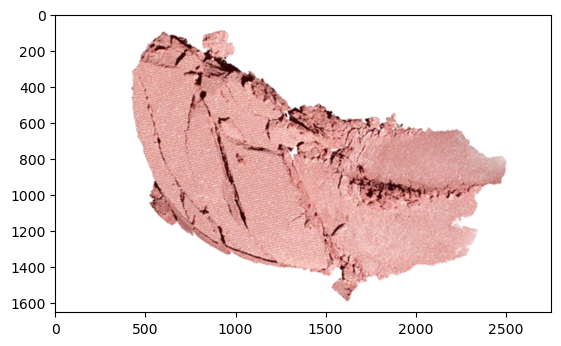

In [221]:
plt.imshow(image)

(array([222.59778813, 159.75203725, 154.16065192]),
 array([  2,  78, 222], dtype=uint8))

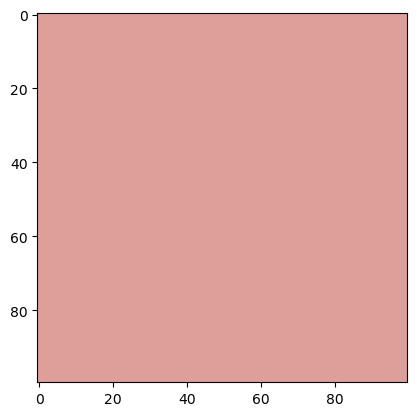

In [223]:
def rgb_to_hsv(rgb):
    rgb = np.array([[rgb]], dtype=np.uint8)
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    return hsv[0][0]

def kmeans_centroid_histogram(image_path, k=5):
    
    # 한글 파일 경로
    image = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8), cv2.IMREAD_COLOR)
    image = cv2.resize(image, (100, 100))
    
    # 배경 제거
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sketch = cv2.GaussianBlur(gray, (0, 0), 3)
    sketch = cv2.divide(gray, sketch, scale=256.0)
    _, threshold = cv2.threshold(sketch, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    result = cv2.bitwise_and(image, image, mask=threshold)
    image = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    # 2차원 배열로 변환
    img = image.reshape((image.shape[0] * image.shape[1], 3))
    
    # 추출할 색상의 수
    clt = KMeans(n_clusters = k)
    clt.fit(img)

    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)

    # 분류한 이미지를 라벨 별로 나눠 히스토그램 생성
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # 전체에서 각 색상이 차지하는 비율
    hist = hist.astype("float")
    hist /= hist.sum()
    
    # 비율이 가장 높은 색상
    if all(clt.cluster_centers_[hist.argmax()] >= 250):
        sorted_idx = np.argsort(hist)
        for (idx, i) in enumerate(sorted_idx):
            if idx==3:
                top_color = clt.cluster_centers_[i]  
    else:
        top_color = clt.cluster_centers_[hist.argmax()]
    
    # hsv로 변환
    rgb = np.array([[top_color]], dtype=np.uint8)
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    hsv = hsv[0][0]

    #색상 확인
    plt.imshow(np.full((100,100,3), top_color, dtype="uint8"))
    
    return top_color, hsv

kmeans_centroid_histogram(img_path, k=5)


In [205]:
def kmeans_centroid_histogram(imag_path, k=5):
    
    # 한글 파일 경로
    image = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8), cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 2차원 배열로 변환
    img = image.reshape((image.shape[0] * image.shape[1], 3))
    
    # 추출할 색상의 수
    clt = KMeans(n_clusters = k)
    clt.fit(img)

    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)

    # 분류한 이미지를 라벨 별로 나눠 히스토그램 생성
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # 전체에서 각 색상이 차지하는 비율
    hist = hist.astype("float")
    hist /= hist.sum()
    
    # 비율이 가장 높은 색상
    if all(clt.cluster_centers_[hist.argmax()] >= 250):
        sorted_idx = np.argsort(hist)
        for (idx, i) in enumerate(sorted_idx):
            if idx==3:
                top_color = clt.cluster_centers_[i]  
    else:
        top_color = clt.cluster_centers_[hist.argmax()]
    
    # hsv로 변환
    rgb = np.array([[top_color]], dtype=np.uint8)
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    hsv = hsv[0][0]

    h, s, v = hsv[0]*(255/180), hsv[1], hsv[2]

    # 계절 판단
    if (0 <= h <= 118) and (0 <= s <= 255) and (129 <= v <= 255):
        return "spring"
    elif (119 <= h <= 255) and (0 <= s <= 189) and ((0 <= v <= 127) or (129 <= v <= 255)):
        return "summer"
    elif (0 <= h <= 118) and (190 <= s <= 255) and (0 <= v <= 127):
        return "fall"
    elif (119 <= h <= 255) and (0 <= s <= 189) and (v == 128):
        return "winter"
    else:
        return "unknown"
    



In [207]:
kmeans_centroid_histogram(img_path)

'spring'

In [149]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist


hist = centroid_histogram(clt)
print(hist)
#[ 0.68881873  0.09307065  0.14797794  0.04675512  0.02337756]

[0.05126029 0.44783951 0.03579604 0.40904707 0.0560571 ]


In [150]:
def get_season(rgb):
    # RGB to HSV 변환
    # hsv = colorsys.rgb_to_hsv(rgb[0] / 255.0, rgb[1] / 255.0, rgb[2] / 255.0)
    # h, s, v = hsv[0] * 360, hsv[1] * 255, hsv[2] * 255

    hsv = colorsys.rgb_to_hsv(rgb[0], rgb[1], rgb[2])
    h, s, v = hsv[0], hsv[1], hsv[2]

    # 계절 판단
    if (0 <= h <= 118) and (0 <= s <= 255) and (129 <= v <= 255):
        return "spring"
    elif (119 <= h <= 255) and (0 <= s <= 189) and ((0 <= v <= 127) or (129 <= v <= 255)):
        return "summer"
    elif (0 <= h <= 118) and (190 <= s <= 255) and (0 <= v <= 127):
        return "fall"
    elif (119 <= h <= 255) and (0 <= s <= 189) and (v == 128):
        return "winter"
    else:
        return "unknown"

In [96]:
clt.cluster_centers_,clt.label

AttributeError: 'KMeans' object has no attribute 'label'

In [138]:
clt.cluster_centers_[0]

array([221.83586017, 159.67547926, 150.17504072])

In [144]:
clt.inertia_

33298721.767097257

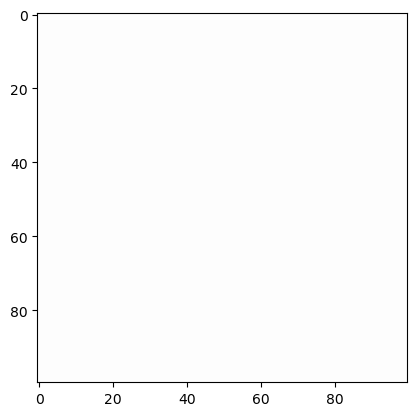

In [76]:
plot = np.full((2,2,3), top_color, dtype="uint8")
plot

array([[[176, 104,  97],
        [176, 104,  97]],

       [[176, 104,  97],
        [176, 104,  97]]], dtype=uint8)

In [34]:
hist_color =[_ for _ in zip(hist, np.unique(clt.labels_))]
hist_color, clt.cluster_centers_

([(0.03625900205761317, 0),
  (0.05106095679012346, 1),
  (0.05599279835390947, 2),
  (0.4088477366255144, 3),
  (0.4478395061728395, 4)],
 array([[221.83586017, 159.67547926, 150.17504072],
        [253.74820526, 253.53813462, 253.02769642],
        [127.82651774,  41.55809764,  38.00558458],
        [249.95979939, 209.30918467, 200.91408043],
        [176.2396382 , 104.69406916,  97.00389283]]))

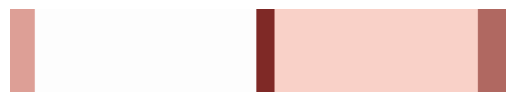

In [215]:
def plot_colors(hist, centroids):
    # 그래프를 그릴 바 생성
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # 대표 색 별 비율, 대표 색
    for (percent, color) in zip(hist, centroids):
        # 전체 길이 중 색상이 차지하는 비율 만큼 사각형을 그림
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype("uint8").tolist(), -1)
        startX = endX
    # return the bar chart
    return bar

bar = plot_colors(hist, clt.cluster_centers_)


# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

- 대표 색상 추출
- 범위가 가장 큰 색상 가져와 hsv로 변환